# Section A

### 1. In the given equation: Y = 4 + 0.56X What do 4 and 0.56 indicate? 
The above equation is a model parameter in which the Y denotes the dependent variable and X denotes the independent variable 
where 4 denotes the intercepts and 0.56 is a coefficient for every increase in Y there is a 0.56 increase in X

lets, say Y=sales and X=advertisement for every increase in sales there is 0.56 increase in advertisement

### 2. Which of the following can be considered a regression problem?
    (a)	Which runner on a track team has the fastest recorded speed
    (b)	How the speeds of runners on a track team relate to how long they each train
    (c)	Which runner has been on a track team the longest
    (d)	Which runner on a track team has the fastest average speed

B is the regression problem because it gives the inference about the speed of the runners on a track team and how they get 
each trained

### 3. What is the ROC curve? How does it help in evaluating a logictic regression model?

The ROC curve or 'Receiver Operating Characteristic' curve is an evaluation method  to access the efficiency 
of a binary classification algorithm and also choose the optimal threshold based on our tolerance for false negatives and 
desire for true positives.
And by using the AUC(Area Under Curve) we can able to see the Accuracy of the model

### 4. What are the measures used to assess the effectiveness of a logistic regression?
The measures used to assess the effectiveness of a Logistic Regression is the AUC of the ROC curve where it get plotted between
the False positive rate and True Positive rate

# Section B

### 5. What is precision and recall? Why is there a tradeoff between the two?

There is a fundamental relationship between Precision and Recall which, for a given model of Recall, constrains the 
behavior of Precision.If Recall is modeled by a polynomial function of proportion of documents found, 
then Precision is modeled by a lower order polynomial function of the same variable.

Recall= TP/(TP+FN) (row total from the confusion matrix of actual 1's)

Precision=TP/(TP+FP) (column total from the confusion matrix of predicted 1's)

### 6. Why is Maximum Likelihood Estimation used instead of OLS estimation for logistic regression?

MLE(Maximum likelihood estimation) is a method that find the values of μ and σ that result in the curve that best fits the data.
The goal of maximum likelihood is to find the parameter values that give the distribution that maximise the probability of 
observing the data. OLS is a method for estimating the unknown parameters in a linear regression model.

### 7. Given the following logistic model:
Predicted logit (Y) = -6.3896 + 0.0266 (X1) - 0.0208 (X2) +1.0790 (X3)
What is the predicted probability of Y = 1 given that X1=10, X2=69 and X3=5?



In [1]:
Y=-6.3896+(0.0266*10)-(0.0208*69)+(1.0790*5)
Y

-2.1638

In [2]:
import numpy as np
exp=np.exp(-(Y))
exp

8.704150666555348

In [3]:
1/(1-exp)

-0.12980016140404954

So, the predicted probablity of Y=1 is that p(y=1)=1/1-e**(-(model parameter)) which gives the value of -0.128

### 8. Why is multicollinearity not desired in a regression model? How to identify it?

Multicollinearity occurs when independent variables in a regression model are correlated. This correlation is a problem 
because independent variables should be independent. If the degree of correlation between variables is high enough, 
it can cause problems when you fit the model and interpret the results.

1.One of the way to identify is that by viewing the 'P-value' which has value higher than 0.5 remove it .

2.And also you can use the 'Principal Components Analysis (PCA)',regression methods that cut the number of predictors to a 
smaller set of uncorrelated components 

### 9. Why are dummy variables used in regression? How do you create dummy variables in Pandas?

A Dummy variable or one-hot encoder is an artificial variable created to represent an attribute with two or more distinct
categories/levels. Regression analysis treats all independent (X) variables in the analysis as numerical.

That means it converts all the categorical variables into numeric values

we can create it by using pandas as 'pd.get_dummies(data)'

# Section C

### 10. Use the ‘Student performance’ dataset to answer the questions given below:

In [4]:
import numpy as np
import pandas as pd
from pandas import  Series,DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
Data=pd.read_csv('StudentsPerformance.csv')
Data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
Data.shape

(1000, 8)

In [7]:
Data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [8]:
Data.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


In [9]:
Exam_score=[]
a=Data['math score']+Data['reading score']+Data['writing score']
Exam_score.append(a)
#Exam_score

In [10]:
Df=Data.iloc[:,5:8]
Df['exam_score']=pd.DataFrame(Exam_score[0])
Df.head()

,math score,reading score,writing score,exam_score
0,72,72,74,218
1,69,90,88,247
2,90,95,93,278
3,47,57,44,148
4,76,78,75,229


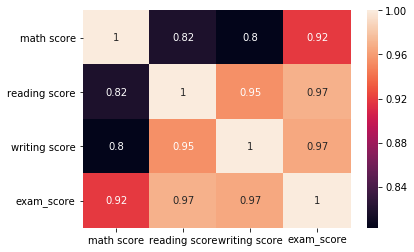

In [11]:
sns.heatmap(Df.corr(),annot=True)
plt.show()

C:\Users\HEMNATH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


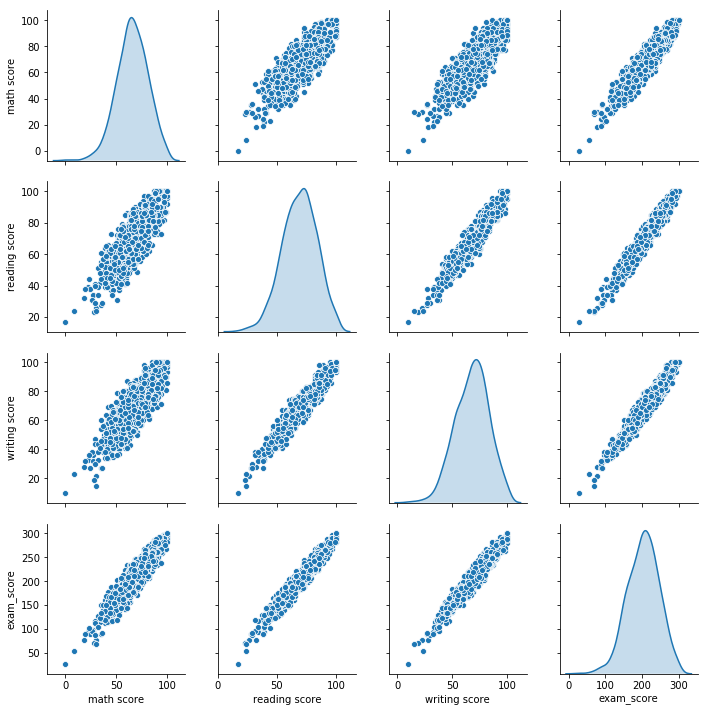

In [12]:
sns.pairplot(Df,diag_kind='kde')
plt.show()

In [13]:
#decide  your regressor and predictor variables
x=Df.iloc[:,[0,1,2]]#gives the IDV
y=Df['exam_score']

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
ln=LinearRegression()#call the function
ln.fit(x_train,y_train)#fit the model
print(ln.intercept_)# get the intercepts
print(ln.coef_)#get the betas

-5.684341886080802e-14
[1. 1. 1.]


In [15]:
#get the error parameter
y_trainp=ln.predict(x_train)
#print(y_trainp)
y_testp=ln.predict(x_test)
#print(y_testp)


In [16]:
SSEtes=sum((y_test-y_testp)**2)
print(SSEtes)

2.7077492799530186e-25


In [17]:
TSStes=sum((y_test-np.mean(y_test))**2)
print(TSStes)

572087.7966666672


In [18]:
### R2 value
R2test=1-(SSEtes/TSStes)
print(R2test)

1.0


The Above created Exam_score has high relation with all other math,reading and writing scores.Since all the attributes has 
high linear regression  it gives the accuracy of 100%

In [20]:
from statsmodels.api import add_constant
import statsmodels.api         as     sm
x2=add_constant(x)
lrn=sm.OLS(y,x2).fit()
print(lrn.summary())

                            OLS Regression Results                            
Dep. Variable:             exam_score   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.177e+32
Date:                Tue, 05 Mar 2019   Prob (F-statistic):               0.00
Time:                        16:59:23   Log-Likelihood:                 29873.
No. Observations:                1000   AIC:                        -5.974e+04
Df Residuals:                     996   BIC:                        -5.972e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.288e-14   4.01e-15      3.210